In [5]:
import pandas as pd
df = pd.read_csv('/home/vivek/datasets/Minimum Wage Data.csv',encoding='latin')
df.to_csv('/home/vivek/datasets/MinimumWageData.csv',encoding = 'utf8')


In [7]:
df = pd.read_csv('/home/vivek/datasets/MinimumWageData.csv')
df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [32]:
gb = df.groupby("State")
gb.get_group("Alabama").set_index("Year")
gb.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88
5,5,1968,Colorado,1.00 - 1.25(b),(b),1.25000,1.00000,34.783333,9.00,7.20
6,6,1968,Connecticut,1.40,NaN,1.40000,1.40000,34.783333,10.08,10.08
7,7,1968,Delaware,1.25,NaN,1.25000,1.25000,34.783333,9.00,9.00
8,8,1968,District of Columbia,1.25 - 1.40,NaN,1.40000,1.25000,34.783333,10.08,9.00
9,9,1968,Federal (FLSA),$1.15 & $1.60,NaN,1.60000,1.15000,34.783333,11.52,8.28


In [11]:
act_min_wage = pd.DataFrame()
for name, group in gb:
    if act_min_wage.empty:
        act_min_wage = group.set_index('Year')[['Low.2018']].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index('Year')[['Low.2018']].rename(columns={"Low.2018":name})
)

act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [12]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,...,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,...,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,...,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,...,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,...,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,...,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010000,...,0.0,8.380000,10.010000,8.330000,10.320000,8.800000,11.520000,9.130000,9.660000,8.980000


In [16]:
act_min_wage.dropna().corr().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.034299,0.489560,0.619368,0.022579,0.631521,-0.205439,0.137961,0.706251,...,NaN,-0.232992,0.277016,0.164755,0.638072,0.331776,0.079230,0.264779,0.715256,0.386297
Arizona,NaN,0.034299,1.000000,0.402066,0.601832,0.775375,0.550665,0.495109,0.660212,-0.003392,...,NaN,0.673255,-0.758607,0.452724,0.638315,0.466566,0.657016,0.795529,0.200104,0.507443
Arkansas,NaN,0.489560,0.402066,1.000000,0.634409,0.607442,0.614433,0.468729,0.712453,0.325165,...,NaN,0.221539,-0.204485,0.505125,0.648199,0.621423,0.480696,0.745047,0.476609,0.195630
California,NaN,0.619368,0.601832,0.634409,1.000000,0.637623,0.953701,0.417050,0.631731,0.359091,...,NaN,0.346920,-0.417782,0.522567,0.939054,0.597519,0.715365,0.709669,0.518153,0.724602


In [17]:
df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [19]:
issue_df = df[df['Low.2018'] == 0]
issue_df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
10,10,1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
11,11,1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0
15,15,1968,Illinois,...,NaN,0.0,0.0,34.783333,0.0,0.0
17,17,1968,Iowa,...,NaN,0.0,0.0,34.783333,0.0,0.0


In [20]:
issue_df['State'].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

In [38]:
import numpy as np

act_min_wage.replace(0,np.NaN).dropna(axis=1).corr()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Georgia,Guam,...,South Dakota,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,0.489560,0.619368,0.022579,0.631521,-0.205439,0.137961,0.706251,-0.383182,0.769926,...,0.170287,-0.232992,0.277016,0.164755,0.638072,0.331776,0.079230,0.264779,0.715256,0.386297
Arkansas,0.489560,1.000000,0.634409,0.607442,0.614433,0.468729,0.712453,0.325165,0.050855,0.487371,...,0.679236,0.221539,-0.204485,0.505125,0.648199,0.621423,0.480696,0.745047,0.476609,0.195630
California,0.619368,0.634409,1.000000,0.637623,0.953701,0.417050,0.631731,0.359091,0.057100,0.467339,...,0.580215,0.346920,-0.417782,0.522567,0.939054,0.597519,0.715365,0.709669,0.518153,0.724602
Colorado,0.022579,0.607442,0.637623,1.000000,0.650475,0.824336,0.893586,-0.076442,0.494289,0.041305,...,0.747398,0.751679,-0.791134,0.600933,0.668542,0.605738,0.806155,0.774387,0.140962,0.471237
Connecticut,0.631521,0.614433,0.953701,0.650475,1.000000,0.431492,0.625850,0.322863,0.149524,0.424014,...,0.529924,0.399383,-0.446165,0.430222,0.949371,0.534899,0.692979,0.663598,0.496666,0.766497
Delaware,-0.205439,0.468729,0.417050,0.824336,0.431492,1.000000,0.813104,-0.335475,0.766954,-0.236386,...,0.764369,0.806548,-0.688552,0.625424,0.411434,0.481170,0.836985,0.572296,-0.202136,0.341372
District of Columbia,0.137961,0.712453,0.631731,0.893586,0.625850,0.813104,1.000000,-0.035544,0.413518,0.167300,...,0.846841,0.671596,-0.693560,0.646867,0.679108,0.652698,0.802782,0.795849,0.110906,0.372424
Federal (FLSA),0.706251,0.325165,0.359091,-0.076442,0.322863,-0.335475,-0.035544,1.000000,-0.603344,0.931899,...,0.196880,-0.336836,0.475240,0.350971,0.398223,0.496545,-0.124229,0.255797,0.882992,0.003615
Georgia,-0.383182,0.050855,0.057100,0.494289,0.149524,0.766954,0.413518,-0.603344,1.000000,-0.569256,...,0.337084,0.834865,-0.546424,0.151755,0.037754,-0.028724,0.481118,0.179514,-0.500883,0.387340
Guam,0.769926,0.487371,0.467339,0.041305,0.424014,-0.236386,0.167300,0.931899,-0.569256,1.000000,...,0.344977,-0.242424,0.340597,0.375312,0.499062,0.513008,-0.023279,0.404382,0.825881,0.035232


In [41]:
min_wage_corr = act_min_wage.replace(0,np.NaN).dropna(axis=1).corr()
# for problem in issue_df['State'].unique():
#     if problem in min_wage_corr.columns():
#         print('Missing')

In [42]:
min_wage_corr

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Georgia,Guam,...,South Dakota,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,0.489560,0.619368,0.022579,0.631521,-0.205439,0.137961,0.706251,-0.383182,0.769926,...,0.170287,-0.232992,0.277016,0.164755,0.638072,0.331776,0.079230,0.264779,0.715256,0.386297
Arkansas,0.489560,1.000000,0.634409,0.607442,0.614433,0.468729,0.712453,0.325165,0.050855,0.487371,...,0.679236,0.221539,-0.204485,0.505125,0.648199,0.621423,0.480696,0.745047,0.476609,0.195630
California,0.619368,0.634409,1.000000,0.637623,0.953701,0.417050,0.631731,0.359091,0.057100,0.467339,...,0.580215,0.346920,-0.417782,0.522567,0.939054,0.597519,0.715365,0.709669,0.518153,0.724602
Colorado,0.022579,0.607442,0.637623,1.000000,0.650475,0.824336,0.893586,-0.076442,0.494289,0.041305,...,0.747398,0.751679,-0.791134,0.600933,0.668542,0.605738,0.806155,0.774387,0.140962,0.471237
Connecticut,0.631521,0.614433,0.953701,0.650475,1.000000,0.431492,0.625850,0.322863,0.149524,0.424014,...,0.529924,0.399383,-0.446165,0.430222,0.949371,0.534899,0.692979,0.663598,0.496666,0.766497
Delaware,-0.205439,0.468729,0.417050,0.824336,0.431492,1.000000,0.813104,-0.335475,0.766954,-0.236386,...,0.764369,0.806548,-0.688552,0.625424,0.411434,0.481170,0.836985,0.572296,-0.202136,0.341372
District of Columbia,0.137961,0.712453,0.631731,0.893586,0.625850,0.813104,1.000000,-0.035544,0.413518,0.167300,...,0.846841,0.671596,-0.693560,0.646867,0.679108,0.652698,0.802782,0.795849,0.110906,0.372424
Federal (FLSA),0.706251,0.325165,0.359091,-0.076442,0.322863,-0.335475,-0.035544,1.000000,-0.603344,0.931899,...,0.196880,-0.336836,0.475240,0.350971,0.398223,0.496545,-0.124229,0.255797,0.882992,0.003615
Georgia,-0.383182,0.050855,0.057100,0.494289,0.149524,0.766954,0.413518,-0.603344,1.000000,-0.569256,...,0.337084,0.834865,-0.546424,0.151755,0.037754,-0.028724,0.481118,0.179514,-0.500883,0.387340
Guam,0.769926,0.487371,0.467339,0.041305,0.424014,-0.236386,0.167300,0.931899,-0.569256,1.000000,...,0.344977,-0.242424,0.340597,0.375312,0.499062,0.513008,-0.023279,0.404382,0.825881,0.035232


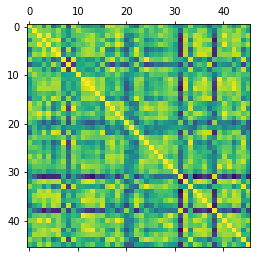

In [43]:
import matplotlib.pyplot as plt
plt.matshow(min_wage_corr)

[Text(0, 1, 'Al'),
 Text(0, 1, 'Ar'),
 Text(0, 1, 'Ca'),
 Text(0, 1, 'Co'),
 Text(0, 1, 'Co'),
 Text(0, 1, 'De'),
 Text(0, 1, 'Di'),
 Text(0, 1, 'Fe'),
 Text(0, 1, 'Ge'),
 Text(0, 1, 'Gu'),
 Text(0, 1, 'Ha'),
 Text(0, 1, 'Id'),
 Text(0, 1, 'Il'),
 Text(0, 1, 'In'),
 Text(0, 1, 'Ka'),
 Text(0, 1, 'Ke'),
 Text(0, 1, 'Ma'),
 Text(0, 1, 'Ma'),
 Text(0, 1, 'Ma'),
 Text(0, 1, 'Mi'),
 Text(0, 1, 'Mi'),
 Text(0, 1, 'Mo'),
 Text(0, 1, 'Ne'),
 Text(0, 1, 'Ne'),
 Text(0, 1, 'Ne'),
 Text(0, 1, 'Ne'),
 Text(0, 1, 'Ne'),
 Text(0, 1, 'Ne'),
 Text(0, 1, 'No'),
 Text(0, 1, 'No'),
 Text(0, 1, 'Oh'),
 Text(0, 1, 'Ok'),
 Text(0, 1, 'Or'),
 Text(0, 1, 'Pe'),
 Text(0, 1, 'Pu'),
 Text(0, 1, 'Rh'),
 Text(0, 1, 'So'),
 Text(0, 1, 'Te'),
 Text(0, 1, 'U.'),
 Text(0, 1, 'Ut'),
 Text(0, 1, 'Ve'),
 Text(0, 1, 'Vi'),
 Text(0, 1, 'Wa'),
 Text(0, 1, 'We'),
 Text(0, 1, 'Wi'),
 Text(0, 1, 'Wy')]

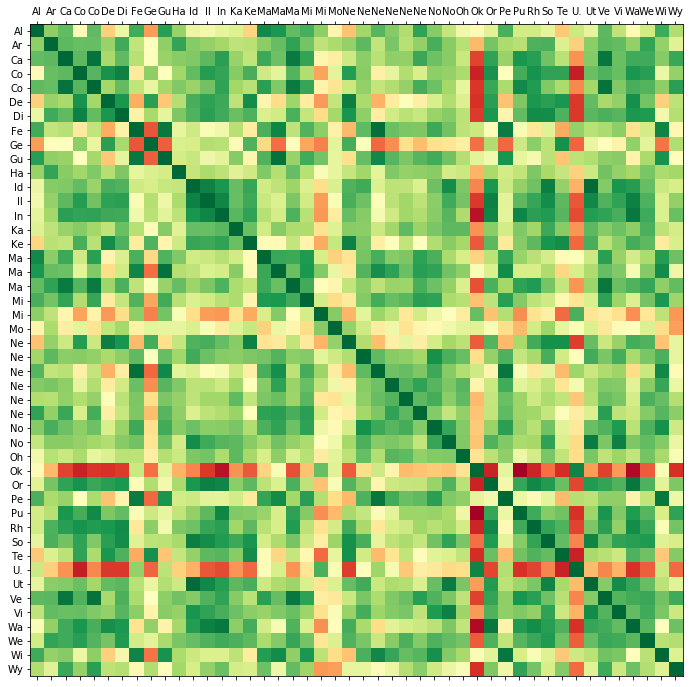

In [44]:
labels = [c[:2] for c in min_wage_corr.columns]
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.matshow(min_wage_corr,cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)




In [52]:
import pandas as pd
#import requests
#web = requests.get('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')
dfs = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')


In [53]:
for df in dfs:
    print(df.head(0))

Empty DataFrame
Columns: [State/District, Abbreviation, Postal Code]
Index: []
Empty DataFrame
Columns: [Territory/Associate, Abbreviation, Postal Code]
Index: []


In [54]:
states_abbv = dfs[0]
states_abbv.head(0)

,State/District,Abbreviation,Postal Code
